# **CS771 Assignment 4**<br>
### Name: Moksh Shukla
### Roll No: 180433

Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [46]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt


def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [47]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

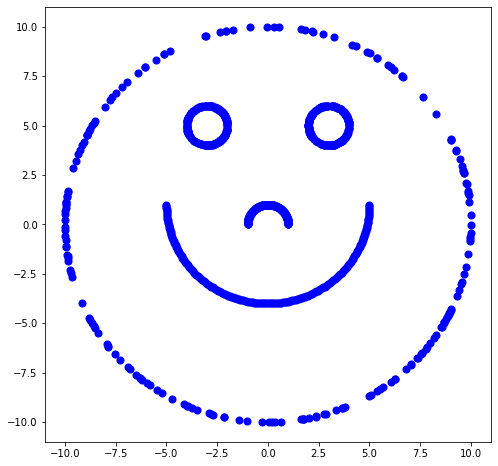

In [48]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]


(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

### ***Part a)***

In [34]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [53]:
#writing the kmeans algorithm
def K_means_training(N,X,mu,A,K):
    mu_old = mu + 1
    itr = 0
    #Convergence Criterion used to break when cluster means do not change much
    while(np.sum(pow(mu-mu_old,2)) > 1e-8):
        itr += 1
        for i in range(N):
            dist = np.array([sum(pow(X[i]-mu_k,2)) for mu_k in mu])
            res = np.argmin(dist)
            #Updating the cluster for each example
            A[i] = res
        for i in range(K):
            mu_old[i] = mu[i]
            values = np.array(np.array([X[j] for j in range(N) if A[j] == i]))
            #Updating the cluster means for each cluster
            mu[i] = np.mean(values,axis=0)
    print("Total Iterations : "+ str(itr))
    return (mu,A)

In [39]:
#plot function to be called to plot clusters with their final centres
def plot_clusters(X,A,mu,K,N):
    fig = plt.figure(figsize = (6,6))
    colors = np.array(["red","green","blue","yellow","purple","orange","beige","brown","gray","cyan","magenta"])[:K]
    plt.title("K = " + str(K))
    plt.scatter(mu[:,0] , mu[:,1], color="black", marker="X")
    for i in range(K):
        x_plot = np.array([X[x] for x in range(N) if A[x] == i])
        plt.scatter(x_plot[:,0] , x_plot[:,1], color=colors[i])

In [49]:
#setting up the parameters for the kmeans clustering
K = 5  # k: the number of clusters
N = X.shape[0]
mu = np.empty((0,2),int) #Randomly initializing the cluster centres
A = np.zeros(N)
loss_arr = np.empty((0,1),int)
for i in range(0,K):
    index = rnd.randint(N)
    mu = np.append(mu, np.array([X[index]]), axis=0);
itr = 25

Total Iterations : 12


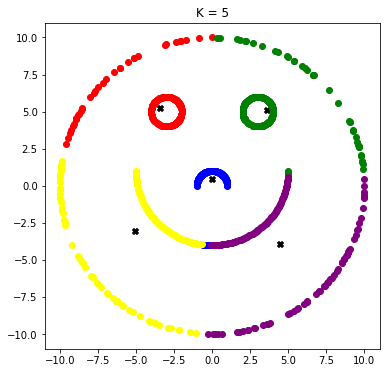

In [54]:
(mu, A) = K_means_training(N,X,mu,A,K)
#Plotting the points with cluster means
plot_clusters(X,A,mu,K,N)

### ***Part b)***

In [56]:
#function to generate the centroids using kmeans++
def K_means_plus_gen(km_plus_mu):
    #choose one point randomly 
    index = rnd.randint(N) 
    km_plus_mu = np.append(km_plus_mu, np.array([X[index]]), axis=0)
    for k in range(1,K):
        for x in range(N):
            curr_dist = np.amin(np.array([pow(sum(pow(X[x] - mu_k,2)),0.5) for mu_k in km_plus_mu]))
            dist[x] = curr_dist
        prob = pow(dist,2)  #randomly choosing the next cluster centre with probability of choosing a point x=D^2
        prob = prob/sum(prob)
        index = rnd.choice(range(0,N),p=prob)
        km_plus_mu = np.append(km_plus_mu, np.array([X[index]]), axis=0)
    return km_plus_mu

In [64]:
#initializing the parameters again
K = 5
N = X.shape[0]
A = np.zeros(N)
loss_arr = np.empty((0,1),int)
itr = 25
km_plus_mu = np.empty((0,2),int)
dist = np.zeros(N)

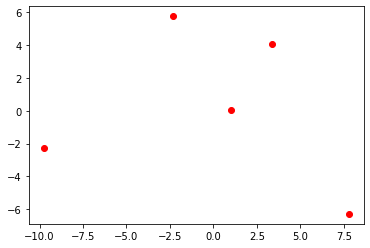

In [65]:
#plotting cluster centres generated with kmeans++
km_plus_mu = K_means_plus_gen(km_plus_mu)
km_plus_mu
plt.scatter(km_plus_mu[:,0] , km_plus_mu[:,1], color = 'red')
plt.show()

Total Iterations : 11


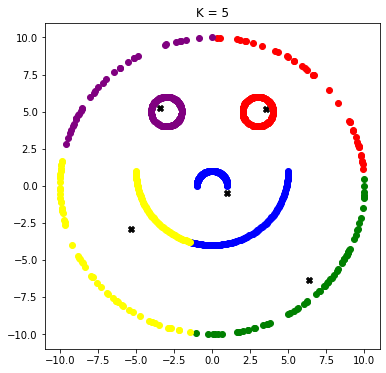

In [60]:
#running the kmeans algo using the centroids initialized with kmeans++
(mu_f,A) = K_means_training(N,X,km_plus_mu,A,K)
plot_clusters(X,A,mu_f,K,N)

### ***Part c)*** Best K value for clustering

In [69]:
#running with different values of K,
# K = 4 - 10
loss_arr = np.array([])
for K in range(4,11):
    N = X.shape[0]
    A = np.zeros(N)
    km_plus_mu = np.empty((0,2),int) #initializing empty array
    dist = np.zeros(N)
    km_plus_mu = k_means_plus_gen(km_plus_mu) #kmeans++ generated centroids
    
    (mu_f,A) = K_means_training(N,X,km_plus_mu,A,K)
    loss = 0
    for x in range(N):
        index = A[x]
        loss += pow(sum(pow(X[x]-mu_f[int(index)],2)),0.5)
    loss_arr = np.append(loss_arr,loss) #loss array storing the loss for each K value
    print("K : ", K, " - ", loss)

Total Iterations : 12
K :  4  -  2741.5070076246575
Total Iterations : 25
K :  5  -  2238.3333274884567
Total Iterations : 15
K :  6  -  2186.4969581616097
Total Iterations : 12
K :  7  -  1881.4963142333731
Total Iterations : 15
K :  8  -  1711.7710355940799
Total Iterations : 22
K :  9  -  1732.2671860468984
Total Iterations : 15
K :  10  -  1500.5576233809415


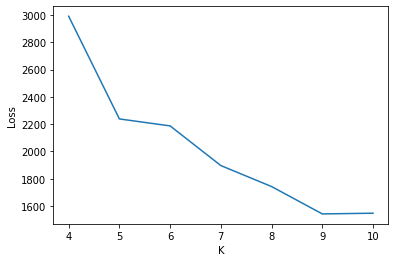

In [68]:
#plotting the curve of Loss vs K
plt.xlabel('K')
plt.ylabel('Loss')
plt.plot(np.arange(4,11),loss_arr)
plt.show()

From the above plot we can see a elbow at **K = 5**. Hence the best value is K = 5

### ***Part d)***

Suppose $\mathcal{S}_{j}$ is the set containing the points in the $j^{th}$ cluster.<br>
The $j^{th}$ cluster centre is
$$
\mu_j=\frac{1}{\left|\mathcal{S}_{j}\right|} \sum_{i \in \mathcal{S}_{j}} \Phi\left(x_{i}\right)
$$
for every iteration, we can calculate the cluster $j$ to which a point ${x}_{i}$ belongs by using the following,<br><br>
$$\underset{j}{\arg \min } \Phi\left({x}_{i}\right)^T \Phi\left({x}_{i}\right)-\frac{2 \sum_{k \in \mathcal{S}_{j}} \Phi\left({x}_{i}\right)^T \Phi\left({x}_{k}\right)}{\left|\mathcal{S}_{j}\right|}+\frac{\sum_{l, k \in \mathcal{S}_{j}} \Phi\left({x}_{l}\right)^T \Phi\left({x}_{k}\right)}{\left(\left|\mathcal{S}_{j}\right|\right)^{2}}$$<br>
$$=\underset{j}{\arg \min } K\left({x}_{i},{x}_{i}\right)-\frac{2 \sum_{k \in \mathcal{S}_{j}} K\left({x}_{i},{x}_{k}\right)}{\left|\mathcal{S}_{j}\right|}+\frac{\sum_{l, k \in \mathcal{S}_{j}} K\left({x}_{l},{x}_{k}\right)}{\left(\left|\mathcal{S}_{j}\right|\right)^{2}}$$<br>

In [72]:
#kernelized loss
def kernel(x,y,sigma):
    #assuming gamma = 1
    return np.exp(-lin.norm(x-y,axis=1)**2/(2*sigma**2))

In [73]:
#plotting function for kernalized cluters
def plot_clusters_kern(X,A,K,N):
    fig = plt.figure(figsize = (8,8))
    colors = np.array(["red","green","blue","yellow","purple","orange","beige","brown","gray","cyan","magenta"])[:K]
    plt.title("K = " + str(K))
    for i in range(K):
        x_plot = X[A==i]
        plt.scatter(x_plot[:,0] , x_plot[:,1], color=colors[i])

In [75]:
#training function for kernalized kmeans clustering
def K_means_kern_training(N,X,K):
    A = rnd.randint(0,K,N,dtype=int)  #Randomly assigning cluster to each example
    Aold = np.zeros(N,dtype=int)
    curr_itr = 0
    while(np.sum(Aold!=A)>=(0.01*N)): #stopping criteria is when the cluster of no example changes
        curr_itr+=1
        print(curr_itr, end=" ")
        #calculate x-u for all the different clusters in teh new space
        for x in range(N):
            Aold[x] = A[x]
            dist = np.zeros(K)
            for k in range(K):
                X_k = X[A==k]
                N_k = X_k.shape[0]
                phi_uk = 0
                for i in range(N_k):
                    phi_uk += np.sum(kernel(X_k[i],X_k,sigma))
                phi_x_uk = np.sum(kernel(X[x],X_k,sigma))
                dist[k] = 1 + (1/(N_k**2))*phi_uk - (2/N_k)*phi_x_uk  #Finding the cluster distance of a point from each cluster mean implicitly
            A[x] = np.argmin(dist)
    print("Total Iteration : ", curr_itr)
    return A

In [76]:
K = 5
sigma = 2
A = K_means_kern_training(N,X,K) #kernalized kmeans for working on our data

1 2 3 Total Iteration :  3


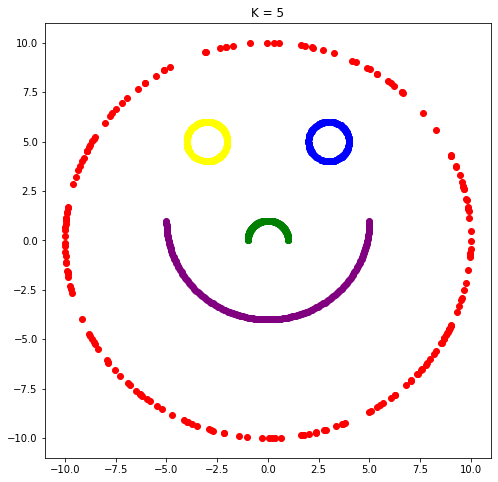

In [77]:
plot_clusters_kern(X,A,K,N) #plotting clusters from kernalized kmeans

### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

### ***Solution Part a)***:

Note : $\displaystyle \Theta \ =\ \left\{\mu _{k} ,\ \sigma _{k}^{2}\right\}_{k=1}^{K}$ and $\displaystyle x_{n} \ \in \ R^{D}$ 

Let's first calculate some basic notations:
##### 1)
\begin{gather*}
p( z_{n} \ =\ k|x_{n} ,\ \hat{\Theta }) \ \varpropto \ p( z_{n} \ =\ k|\hat{\Theta }) \ *\ p( x_{n} |z_{n} \ =\ k,\hat{\Theta })\\
=\ \pi _{k} \ *\ N\left( x_{n} |\widehat{u_{k}} ,\ \widehat{\sigma _{k}^{2}} I_{D}\right) \ 
\end{gather*}
Also 
##### 2)
\begin{gather*}
\hat{\Theta } \ =\ argmax_{\Theta } \ E_{ p( Z|X ,\ \hat{\Theta })}[ log\ ( p( X,Z|\Theta ))]\\
=argmax_{\Theta } \ E_{p( Z|X ,\ \hat{\Theta })}\left[\sum _{n=1}^{N} log\ ( p( x_{n} ,z_{n} |\Theta ))\right]\\
we\ have\ p( x_{n} ,z_{n} |\Theta ) \ =\ \sum _{k=1}^{K}( p( z_{n} \ =\ k|\Theta ) \ *\ p( x_{n} |z_{n} =k,\Theta ))^{z_{n}{}_{k}}\\
where\ z_{n}{}_{k} \ =1\ when\ x_{n} \ belongs\ to\ k^{th} \ cluster,\ else\ z_{n}{}_{k} \ =0\ \\
=\ argmax_{\Theta } \ E\left[\sum _{n=1}^{N}\sum _{k=1}^{K} z_{n}{}_{k}\left[ log\ \pi _{k} \ +\ log\ N\left( x_{n} |u_{k} ,\ \sigma _{k}^{2} I_{D}\right)\right]\right]\\
using\ Expectation\ of\ z_{n}{}_{k}\\
=\ argmax_{\Theta }\sum _{n=1}^{N}\sum _{k=1}^{K} \ E_{p( z_{n} |x_{n} ,\ \hat{\Theta })}[ z_{n}{}_{k}]\left[ log\ \pi _{k} \ +\ log\ N\left( x_{n} |u_{k} ,\ \sigma _{k}^{2} I_{D}\right)\right]
\end{gather*}

### ***Expectation Step***<br>
Using expression 1)
\begin{gather*}
E[ z_{n}{}_{k}] \ =\ \gamma _{n}{}_{k}\\
=\ 0*p( z_{n}{}_{k} \ =\ 0\ |\ x_{n} ,\hat{\Theta }) \ +1*p( z_{n}{}_{k} \ =\ 1\ |\ x_{n} ,\hat{\Theta })\\
=\ \ \frac{\pi _{k} *N\left( x_{n} |\hat{\mu }_{k} ,\ \widehat{\sigma _{k}^{2}} I_{D}\right)}{\sum _{i=1}^{K} \pi _{i} *N\left( x_{n} |\widehat{\mu _{i}} ,\ \widehat{\sigma _{i}^{2}} I_{D}\right)}
\\
N_k =\sum_{n=1}^{N}\gamma_{nk}
\end{gather*}

### ***Maximization Step***<br>
$\displaystyle =\ argmax_{\Theta }\sum _{n=1}^{N}\sum _{k=1}^{K} \ E_{p( z_{n} |x_{n} ,\ \hat{\Theta })}[ z_{n}{}_{k}]\left[ log\ \pi _{k} \ +\ log\ N\left( x_{n} |u_{k} ,\ \sigma _{k}^{2} I_{D}\right)\right]$

\begin{gather*}
\hat{\Theta } =\ argmax_{\Theta }\sum _{n=1}^{N}\sum _{k=1}^{K} \ E_{p( z_{n} |x_{n} ,\ \hat{\Theta })}[ z_{n}{}_{k}]\left[ log\ \pi _{k} \ +\ log\ N\left( x_{n} |u_{k} ,\ \sigma _{k}^{2} I_{D}\right)\right]\\
=argmax_{\Theta }\sum _{n=1}^{N}\sum _{k=1}^{K} \ \gamma _{n}{}_{k}\left[ log\ \pi _{k} \ +\ log\ N\left( x_{n} |u_{k} ,\ \sigma _{k}^{2} I_{D}\right)\right]\\
=\ argmax_{\Theta }\sum _{n=1}^{N}\sum _{k=1}^{K} \ \gamma _{n}{}_{k}\left[ log\ \pi _{k} \ +\ log\ \frac{1}{\sqrt{( 2\pi )^{D} |\sigma _{k}^{2} I_{D} |}} exp\left( -\frac{1}{2}( x_{n} -\mu _{k})^{T}\frac{I_{D}}{\sigma _{k}^{2}}( x_{n} -\mu _{k})\right)\right]\\
=\ argmax_{\Theta }\sum _{n=1}^{N}\sum _{k=1}^{K} \ \gamma _{n}{}_{k}\left[ log\ \pi _{k} \ +\ log\ \frac{1}{( 2\pi )^{D/2}\left( \sigma _{k}^{2}\right)^{D/2}} exp\left( -\frac{1}{2}( x_{n} -\mu _{k})^{T}\frac{I_{D}}{\sigma _{k}^{2}}( x_{n} -\mu _{k})\right)\right]\\
=\ argmax_{\Theta }\sum _{n=1}^{N}\sum _{k=1}^{K} \ \gamma _{n}{}_{k}\left[ log\ \pi _{k} \ +\ -\ \frac{D}{2} log( 2\pi ) \ -\ \frac{D}{2} log\left( \sigma _{k}^{2}\right) \ -\ \left(\frac{1}{2\sigma _{k}^{2}}( x_{n} -\mu _{k})^{T} I_{D}( x_{n} -\mu _{k})\right)\right]\\
\ 
\end{gather*}


#### To find the MLE estimates of $\mu_{k}$ and $\sigma_{k}^{2}$, we take the partial derivate of the above expression with respect to $\mu_{k}$ and $\sigma_{k}^{2}$

#### Finding $\mu_{k}$ <br>

\begin{gather*}
\frac{\partial \hat{\Theta }}{\partial \mu _{k}} \ =\ 0\\
[[All\ the\ terms\ not\ belonging\ to\ the\ cluster\ of\ the\ paramter\ under\ consideration\ will\ go\ to\ 0]]\\
\Longrightarrow \sum _{n=1}^{N} \ \ \gamma _{n}{}_{k}\left[ \ -\ \frac{\partial }{\partial \mu _{k}}\left(\frac{1}{2\sigma _{k}^{2}}( x_{n} -\mu _{k})^{T} I_{D}( x_{n} -\mu _{k})\right)\right] \ =\ 0\\
\Longrightarrow \ \sum _{n=1}^{N} \ \ \gamma _{n}{}_{k}\left[ \ -\ \left(\frac{( x_{n} -\mu _{k})}{\sigma _{k}^{2}}\right)\right] \ =\ 0\\
\Longrightarrow \ \sum _{n=1}^{N} \ \ -\gamma _{n}{}_{k}( x_{n} -\mu _{k}) \ =\ 0\\
\Longrightarrow \ \sum _{n=1}^{N} \ -\gamma _{n}{}_{k} x_{n} +\ \sum _{n=1}^{N} \ \ \gamma _{n}{}_{k} \mu _{k} \ =\ 0\\
\Longrightarrow \ \mu _{k}\sum _{n=1}^{N} \ \ \gamma _{n}{}_{k} \ =\sum _{n=1}^{N} \gamma _{n}{}_{k} x_{n}\\
\Longrightarrow \mu _{k} \ =\ \frac{\sum _{n=1}^{N} \gamma _{n}{}_{k} x_{n}}{\sum _{n=1}^{N} \ \ \gamma _{n}{}_{k}}\\
\Longrightarrow \ \mu _{k} \ =\ \frac{\sum _{n=1}^{N} \gamma _{n}{}_{k} x_{n}}{N_{k}}
\end{gather*}

#### Finding $\sigma_{k}^{2}$ <br>

\begin{gather*}
\frac{\partial \hat{\Theta }}{\partial \sigma _{k}^{2}} \ =\ 0\\
[[All\ the\ terms\ not\ belonging\ to\ the\ cluster\ whose\ parameter\ is\ under\ consideration\ will\ go\ to\ 0]]\\
\Longrightarrow \sum _{n=1}^{N} \ \gamma _{n}{}_{k}\frac{\partial }{\partial \sigma _{k}^{2}}\left[ -\ \frac{D}{2} log\left( \sigma _{k}^{2}\right) \ -\ \left(\frac{1}{2\sigma _{k}^{2}}( x_{n} -\mu _{k})^{T} I_{D}( x_{n} -\mu _{k})\right)\right] \ =\ 0\\
\Longrightarrow \sum _{n=1}^{N} \ \gamma _{n}{}_{k}\left[ -\ \frac{D}{2\sigma _{k}^{2}} \ -\ \left( -\ \frac{1}{2\left( \sigma _{k}^{2}\right)^{2}}( x_{n} -\mu _{k})^{T} I_{D}( x_{n} -\mu _{k})\right)\right] \ =\ 0\\
\Longrightarrow \ \sum _{n=1}^{N} \ \gamma _{n}{}_{k}\left[ \ D\sigma _{k}^{2} \ \ -\ ( x_{n} -\mu _{k})^{T} I_{D}( x_{n} -\mu _{k})\right] \ =\ 0\\
\Longrightarrow \sum _{n=1}^{N} \ \gamma _{n}{}_{k} \ D\sigma _{k}^{2} \ \ =\sum _{n=1}^{N} \ \gamma _{n}{}_{k} \ ( x_{n} -\mu _{k})^{T}( x_{n} -\mu _{k})\\
\Longrightarrow D\sigma _{k}^{2}\sum _{n=1}^{N} \ \gamma _{n}{}_{k} \ \ \ =\sum _{n=1}^{N} \ \gamma _{n}{}_{k} \ ( x_{n} -\mu _{k})^{T}( x_{n} -\mu _{k})\\
\Longrightarrow \ \sigma _{k}^{2} \ \ =\frac{\sum _{n=1}^{N} \ \gamma _{n}{}_{k} \ ( x_{n} -\mu _{k})^{T}( x_{n} -\mu _{k})}{N_{k} D}
\end{gather*}

### The EM Algorithm proceeds as follows :<br>
#### ***1.Initialization***
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Set $\displaystyle \Theta \ =\ \left\{\mu _{k} ,\ \sigma _{k}^{2}\right\}_{k=1}^{K}$ as $\Theta^{0}$ and  $t = 0$<br>

#### ***2.E-Step*** 

\begin{gather*}
E[ z_{n}{}_{k}] \ =\ \gamma _{n}{}_{k} =\ \ \frac{\pi _{k} *N\left( x_{n} |\mu _{k}^{t-1} ,\ \left( \sigma _{k}^{2}\right)^{t-1} I_{D}\right)}{\sum _{i=1}^{K} \pi _{i} *N\left( x_{n} |\mu _{k}^{t-1} ,\ \left( \sigma _{k}^{2}\right)^{t-1} I_{D}\right)}
\\
N_k =\sum_{n=1}^{N}\gamma_{nk}
\end{gather*}<br>

#### ***3.M-Step*** 

\begin{gather*}
\mu _{k}^{t} \ =\ \frac{\sum _{n=1}^{N} \gamma {_{nk}^{t}} x_{n}}{N_{k}^{t}}\\
\ \left( \sigma _{k}^{2}\right)^{t} \ \ =\frac{\sum _{n=1}^{N} \ \gamma {_{nk}^{t}} \ \left( x_{n} -\mu _{k}^{t}\right)^{T}\left( x_{n} -\mu _{k}^{t}\right)}{N_{k}^{t} D}\\
\end{gather*}<br>

#### 4. Update t = t + 1 and move to the next iteration if the parameter values do not converge





###***Part b)***

In [82]:
from scipy.stats import multivariate_normal #extra library to generate artificial data

In [83]:
#initializing the parameters
K = 3
N = 100
D = 2
#Initializing mu, sigma^2 and pi for generation of data
mu_syn = np.zeros((K,2))
mu_syn[0,:] = [-10,10]
mu_syn[1,:] = [10,1]
mu_syn[2,:] = [-5,-10]

var_syn = np.array([4,9,16])
pi_syn = np.array([1./3,1./3,1./3])
I = np.eye(D)

In [84]:
#artificial data generator
def data_generator(mu_syn,var_syn,pi_syn):
    y=np.zeros(N,dtype=int)
    x_syn = np.zeros((N,2))
    for i in range(N):
        k = rnd.choice(np.arange(K),p=pi_syn)
        y[i] = k
        x_syn[i,:] = multivariate_normal(mean = mu_syn[k], cov = var_syn[k]*I).rvs()
    return (x_syn,y)

In [85]:
(x_syn, y) = data_generator(mu_syn,var_syn,pi_syn)  #generating data

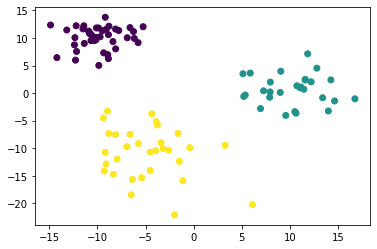

In [86]:
plt.scatter(x_syn[:,0],x_syn[:,1],c=y) #plotting generated data
plt.show()

In [87]:
pi_t = pi_syn
mu_t = 10*rnd.random((K,2))
var_t = 10*rnd.random(K)
gam_t = np.zeros((N,K))

In [9]:
pi_t

array([0.33333333, 0.33333333, 0.33333333])

In [10]:
mu_t

array([[2.64188773, 4.08593662],
       [0.2209904 , 6.7286951 ],
       [8.61723596, 2.37504489]])

In [11]:
var_t

array([2.29402311, 0.1494131 , 1.46316345])

In [88]:
#function to implement EM algorithm
def EM(itrs,pi_t,mu_t,var_t,gam_t):
    for t in range(itrs):
        print(str(t), end=" | ")
        #EXPECTATION STEP 
        for n in range(N):
            total = 0.
            for k in range(K):
                gam_t[n][k] = pi_t[k] * multivariate_normal(mean = mu_t[k], cov = var_t[k]*I).pdf(x_syn[n,:])
                total += gam_t[n][k]
            gam_t[n,:]/=total

        N_k_t = np.sum(gam_t,axis = 0)
        #MAXIMIZATION STEP
        #UPDATING MU
        for k in range(K):
            mu_t[k,:] = (1./N_k_t[k])*(np.dot(gam_t[:,k],x_syn))
        #UPDATING SIGMA
        for k in range(K):
            total = 0
            for n in range(N):
                total += gam_t[n,k]*np.dot(x_syn[n,:]-mu_t[k,:],x_syn[n,:]-mu_t[k,:])
            total/=(D*N_k_t[k])
            var_t[k] = total
    return (mu_t,var_t)

In [103]:
#random initialization of mu, sigma^2, and gamma
pi_t = pi_syn
np.random.seed(0)
mu_t = 10*np.random.random((K,2))
var_t = 10*np.random.random(K)
gam_t = np.zeros((N,K))
itrs = 100

In [104]:
(mu_f,var_f) = EM(itrs,pi_t,mu_t,var_t,gam_t)
#mu_f: Stores the mu returned by EM Algorithm and var_f: Stores the sigma^2 returned by EM Algorithm

0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 33 | 34 | 35 | 36 | 37 | 38 | 39 | 40 | 41 | 42 | 43 | 44 | 45 | 46 | 47 | 48 | 49 | 50 | 51 | 52 | 53 | 54 | 55 | 56 | 57 | 58 | 59 | 60 | 61 | 62 | 63 | 64 | 65 | 66 | 67 | 68 | 69 | 70 | 71 | 72 | 73 | 74 | 75 | 76 | 77 | 78 | 79 | 80 | 81 | 82 | 83 | 84 | 85 | 86 | 87 | 88 | 89 | 90 | 91 | 92 | 93 | 94 | 95 | 96 | 97 | 98 | 99 | 

In [105]:
(x_gen, y_gen) = data_generator(mu_f,var_f,pi_t) #x_gen,y_gen are values generated by taking mu and sigma^2 returned by EM Algorithm

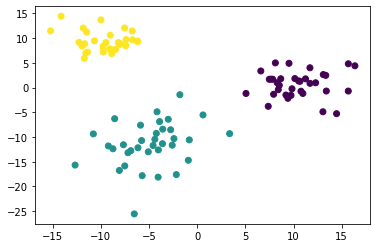

In [106]:
plt.scatter(x_gen[:,0],x_gen[:,1],c=y_gen) 
plt.show()